# TASK 2: EXPLORATORY DATA ANALYSIS(EDA)

## OBJECTIVE:
- Calculate summary statistics (mean, median, mode,standard deviation).
- Visualize data distributions using histograms, boxplots and scatter plots.
- Find correlations between numerical features.

### 1. IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. READING THE CSV FILE

In [11]:
sentiment=pd.read_csv('Sentiment dataset.csv')
print(sentiment.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

### 3. DROPPING UNNECESSARY COLUMNS

In [14]:
sentiment=sentiment.drop('Unnamed: 0',axis=1)

In [16]:
sentiment=sentiment.rename(columns={'Unnamed: 0.1':'SL No'})

In [18]:
sentiment.head()

,SL No,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### 4. CHECKING FOR NULL VALUES

In [21]:
sentiment.isnull().sum()

SL No        0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

### 5.VERIFYING DATATYPES

In [24]:
sentiment.dtypes

SL No          int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

### 6. SUMMARY STATISTICS

In [28]:
numeric_col=sentiment.select_dtypes(include=['number'])

#### a)MEAN: mean is the sum of all values divided by the number of values

In [32]:
numeric_col.mean()

SL No        366.464481
Retweets      21.508197
Likes         42.901639
Year        2020.471311
Month          6.122951
Day           15.497268
Hour          15.521858
dtype: float64

#### b)MEDIAN: The median is the middle value when the values are sorted

In [40]:
numeric_col.median()

SL No        366.5
Retweets      22.0
Likes         43.0
Year        2021.0
Month          6.0
Day           15.0
Hour          16.0
dtype: float64

#### c)MODE:mode is the value that occurs most of the time in a sequence of numbers

In [43]:
numeric_col.mode().iloc[0]

SL No          0.0
Retweets      22.0
Likes         45.0
Year        2023.0
Month          2.0
Day           15.0
Hour          14.0
Name: 0, dtype: float64

#### d)STANDARD DEVIATION:It measures the amount of variation from the mean

In [46]:
numeric_col.std()

SL No       211.513936
Retweets      7.061286
Likes        14.089848
Year          2.802285
Month         3.411763
Day           8.474553
Hour          4.113414
dtype: float64

### 7. VISUALIZING THE DATA DISTRIBUTION

#### a)HISTOGRAM

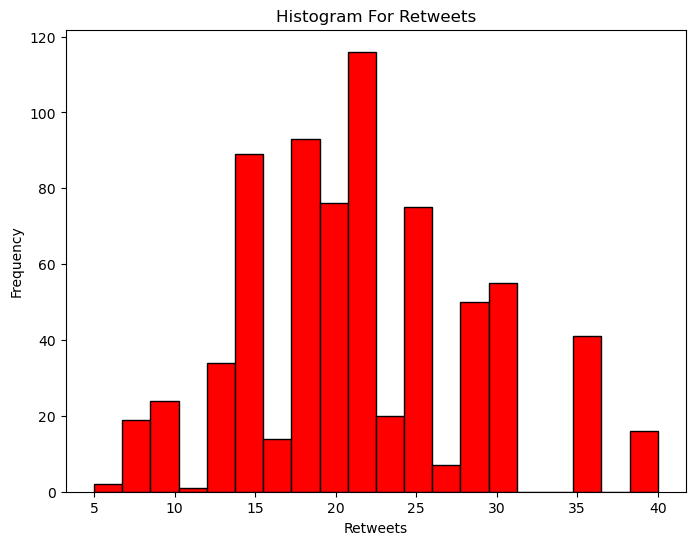

In [99]:
plt.figure(figsize=(8,6))
sentiment['Retweets'].hist(bins=20,grid=False,color='red',edgecolor='black')
plt.title('Histogram For Retweets')
plt.xlabel('Retweets')
plt.ylabel('Frequency')
plt.show()

#### INTERPRETATION FOR HISTOGRAM
- This histogram displays the distribution of retweets.
- The majority of tweets received between 15 to 25 with highest frequency reaching about 115 tweets.
- The data is slightly right-skewed as there are more tweets with lower retweet counts and fewer with higher ones.
- The maximum number of retweets is close to 40 and the minimum number of retweets is 5.

#### b)BOXPLOT

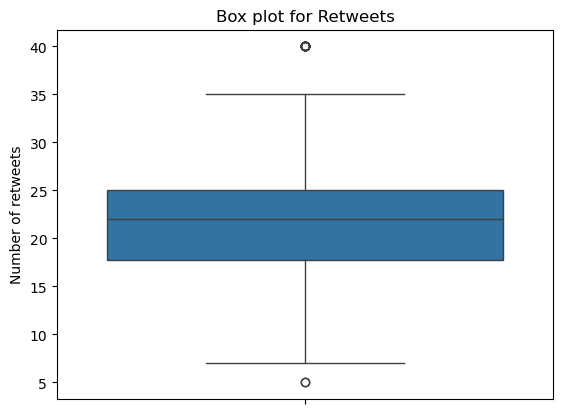

In [73]:
sns.boxplot(y=sentiment[sentiment['Retweets']>0]['Retweets'])
plt.title('Box plot for Retweets')
plt.ylabel('Number of retweets')
plt.show()

#### INTERPRETATION FOR BOX PLOT
- This box plot represents the distribution of Retweet counts.
- The median number of retweets is approximately 22.
- Most retweet values(the interquartile range) fall between 17 and 25.
- The lowest retweet is around 7 and the highest retweet value is around 35.

#### c)SCATTER PLOT

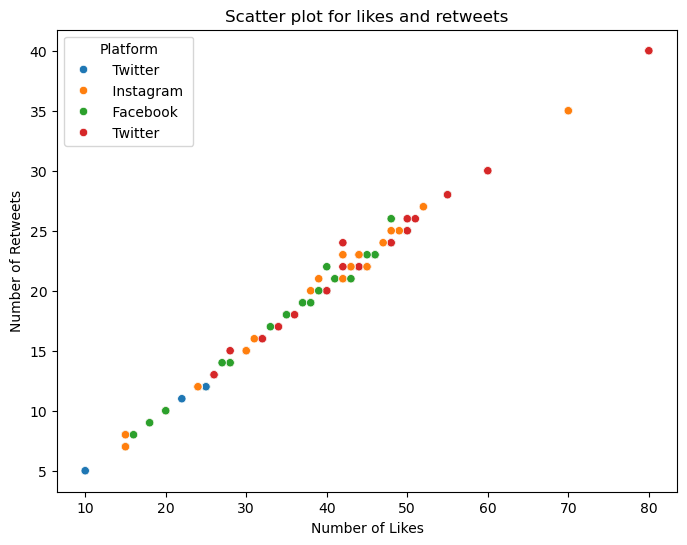

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Likes',y='Retweets',hue='Platform',data=sentiment,color='red')
plt.title('Scatter plot for likes and retweets')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.grid(False)
plt.show()

#### INTERPRETATION OF SCATTER PLOT
- This scatter plot visualizes the connection between number of likes and number of retweets.
- A strong possible correlation is observed as likes increase retweets also increase.
- Each color represents a different platform like Blue: Twitter,Orange:Instagram,Green:Facebook,Red:Twitter
- The trend is consistent across all platforms showing that posts with more likes usually receives more retweets.
- Platforms like Instagram and twitter show several data points with both high likes and high retweets.

### 8. CORRELATION BETWEEN NUMERICAL FEATURE

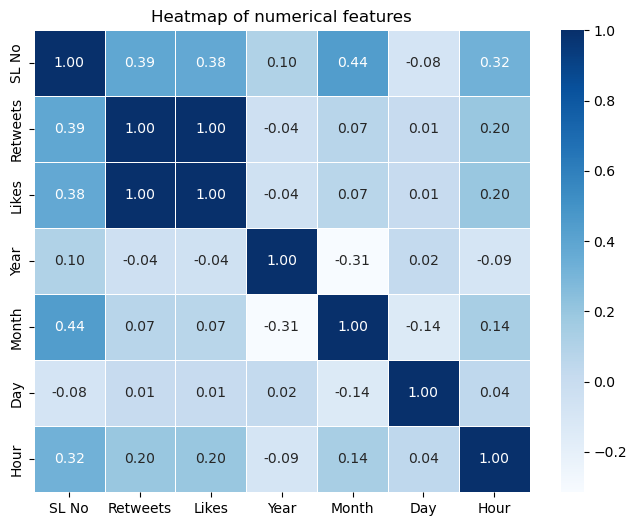


 correlation matrix:
             SL No  Retweets     Likes      Year     Month       Day      Hour
SL No     1.000000  0.388637  0.376208  0.101578  0.443013 -0.080101  0.322371
Retweets  0.388637  1.000000  0.998482 -0.039982  0.073265  0.009213  0.196955
Likes     0.376208  0.998482  1.000000 -0.043415  0.066643  0.011489  0.195331
Year      0.101578 -0.039982 -0.043415  1.000000 -0.314845  0.021973 -0.087470
Month     0.443013  0.073265  0.066643 -0.314845  1.000000 -0.135873  0.137835
Day      -0.080101  0.009213  0.011489  0.021973 -0.135873  1.000000  0.044072
Hour      0.322371  0.196955  0.195331 -0.087470  0.137835  0.044072  1.000000


In [95]:
corr_matrix=sentiment.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='Blues',linewidth=0.5,fmt='.2f')
plt.title('Heatmap of numerical features')
plt.show()
print('\n correlation matrix:')
print(corr_matrix)

#### INTERPRETATION:
- The heatmap shows the correlation between various numerical features.
- Darker blue represent strong positive correlation while lighter shades indicate weaker ones.
- Retweets and likes have very strong positive correlation i.e. 1.00.
- Day has nearly no correlation with any other feature.

#### EXTRA POINTS:
- Retweets and likes are almost perfectly correlated
- Date related features like Year,Month,Day don't strongly influence Retweets or likes in this dataset.
- Hour has a small positive impact